# Optikk Assignment 6 Interference

### Libraries and data

###### Constants

In [77]:
c = 3e8 #[meter/sekund]

###### Libraries

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm

###### Files

In [79]:
lysror_data = np.fromfile("lysror.txt", dtype = float,sep = " ")
laserpekere_data = np.fromfile("laserpeker.txt", dtype = float,sep = " ")
lysror = np.array([lysror_data[::2],lysror_data[1::2]]) #first row are the wavelengths, second are the normalised I
laserpeker = np.array([laserpekere_data[::2],laserpekere_data[1::2]]) # same proccedure

###### Functions

In [80]:
def find_peaks(lysror,laserpeker):
    lysror_peak_1 = max(lysror[1])
    lysror_peak_2 = max(lysror[1][lysror[0] < 600])
    lysror_peak_3 = max(lysror[1][lysror[0] < 500])
    lysror_peak = np.array([lysror_peak_1,lysror_peak_2,lysror_peak_3])
    laser_peak = max(laserpeker[1])
    lambda_lysror = [0,0,0]
    lambda_lysror_count = [0,0,0]
    for count,i in enumerate(lysror[1]):
        if i == lysror_peak_1:
            lambda_lysror[0] = lysror[0][count]
            lambda_lysror_count[0] = count
        if i == lysror_peak_2:
            lambda_lysror[1] = lysror[0][count]
            lambda_lysror_count[1] = count
        if i == lysror_peak_3:
            lambda_lysror[2] = lysror[0][count]
            lambda_lysror_count[2] = count
    for count,i in enumerate(laserpeker[1]):
        if i == laser_peak:
            lambda_laser = laserpeker[0][count]
            lambda_laser_count = count
    return np.array([[lambda_lysror,lambda_lysror_count,lysror_peak],[lambda_laser,lambda_laser_count,laser_peak]])

def union(lst1, lst2):
    final_list = list(set(lst1) | set(lst2))
    return final_list

### Oppgave 1

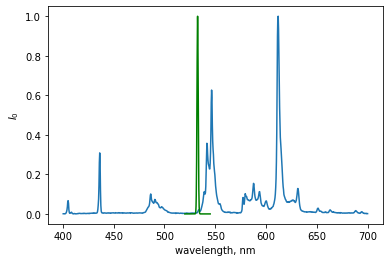

[611.91, 546.38, 436.25]
532.593013830138


In [81]:
plt.plot(lysror[0],lysror[1])
plt.plot(laserpeker[0],laserpeker[1],'g')
plt.xlabel("wavelength, nm")
plt.ylabel("$I_0$")
plt.show()

peaks_data = find_peaks(lysror,laserpeker)
lambda_lysror,lambda_laser = peaks_data[0][0],peaks_data[1][0]
print(lambda_lysror)
print(lambda_laser)

The main peaks for the flourecent light are at 612nm, 546nm, 436nm in decending order, which corresponds to orange, green and blue ligth respectably. The green laser have only one peak at 533nm, which as we might have guessed corresponds to green light, albeit a little draker green than the flourecent tube's secound peak. Here we say the flourecent tube only got 1 peak at the green wavelength, but you could argue for 2 thinner peaks instead.

### Oppgave 2a

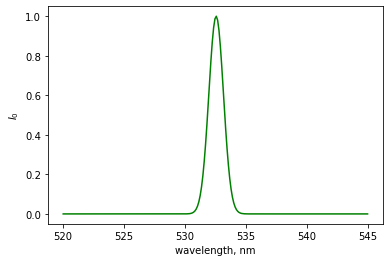

532.593013830138 533.472843428434
Halflength is: 0.88nm and coherence length is : 14771.04nm


In [82]:
plt.plot(laserpeker[0],laserpeker[1],'g')
plt.xlabel("wavelength, nm")
plt.ylabel("$I_0$")
plt.show()
def find_FWHM():
    peaks_data = find_peaks(lysror,laserpeker)
    lambda_lysror,lambda_lysror_count,lysror_peak,lambda_laser,lambda_laser_count,laser_peak = peaks_data[0][0],peaks_data[0][1],peaks_data[0][2],peaks_data[1][0],peaks_data[1][1],peaks_data[1][2]
    best_approx = 0
    before = True
    for count,i in enumerate(laserpeker[1]):
        if count > lambda_laser_peak and before: #Finding best wavelength for halflength for each side of peak.
            best_approx = 0
            before = False
        if abs(i-laser_peak/2) < abs(i-best_approx) :
            best_halflength = count
            if before:
                best_lower_approx = best_halflength
            else:
                best_upper_approx = best_halflength
    halflength = laserpeker[0][best_upper_approx]-laserpeker[0][best_lower_approx]
coherence_length = lambda_laser_peak**2/halflength
print(laserpeker[0][best_lower_approx],laserpeker[0][best_upper_approx])

print(f"""Halflength is: {halflength:.2f}nm and coherence length is : {coherence_length:.2f}nm""")

### Oppgave 2b

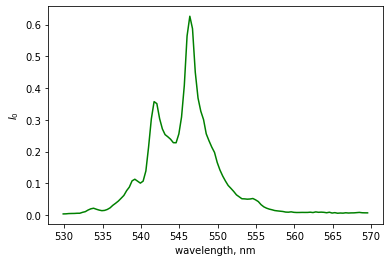

14926.55522


In [83]:
closest530 = closest570 = 0
for count,i in enumerate(lysror[0]):
    if abs(i-530) < abs(closest530 - 530):
        closest530 = i
        closest530_count = count
    if abs(i-570) < abs(closest570 - 570):
        closest570 = i
        closest570_count = count
lysror530_570 = np.array([lysror[0][closest530_count:closest570_count],lysror[1][closest530_count:closest570_count]])

plt.plot(lysror530_570[0],lysror530_570[1],"g")
plt.xlabel("wavelength, nm")
plt.ylabel("$I_0$")
plt.show()

lambda0 = 546.38 #øyemål fra grafen
bandwidth = 557-535 #øyemål for lengden mellom der spekteret er omtrent 0
length_c = lambda0**2/bandwidth
print(lenght_c)

###### Oppgave 2c

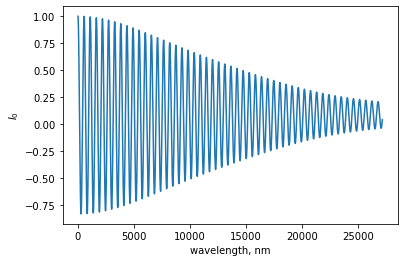

In [87]:
def intensity_superimposer(s,data):
    return 2*(1+ sum(data[1]*np.cos(2*np.pi*s/data[0])))

ss = np.linspace(0,2*length_c,10000)
Is = np.array([intensity_superimposer(s,lysror530_570) for s in ss])/max([intensity_superimposer(s,lysror530_570) for s in ss])
plt.plot(ss,Is)
plt.xlabel("wavelength, nm")
plt.ylabel("$I_0$")
plt.show()

Kommentar: Ser her at det ved armlengde 0 er en stor interferens, men dest lenger vi øker armlengde desto mindre coherent blir lystet og interferensen bli mindre synlig.